In [1]:
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[tf]
# PyTorch
!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining python-doctr[torch] from git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]
  Cloning https://github.com/mindee/doctr.git to ./src/python-doctr
  Running command git clone --filter=blob:none --quiet https://github.com/mindee/doctr.git /content/src/python-doctr
  Resolved https://github.com/mindee/doctr.git to commit 523bc31b9d865905ddbbba70066338556c184695
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Running setup.py develop for python-doctr


In [ ]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,202 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-freefont-ttf all 20120503-7 [4,202 kB]
Fetched 4,202 kB in 1s (4,364 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading database ... 1

Let's take care of all the imports directly

In [ ]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

In [2]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [9]:
# Download a sample
!wget https://persist.signzy.tech/api/files/45016609/download/fhQatpDVwr6je7xyGNEBk6bhBvREo4sAbEPTZ05Lm9zBe8sd52.png
# Read the file


doc = DocumentFile.from_images("/content/fhQatpDVwr6je7xyGNEBk6bhBvREo4sAbEPTZ05Lm9zBe8sd52.png")

--2023-01-28 11:48:08--  https://persist.signzy.tech/api/files/45016609/download/fhQatpDVwr6je7xyGNEBk6bhBvREo4sAbEPTZ05Lm9zBe8sd52.png
Resolving persist.signzy.tech (persist.signzy.tech)... 13.234.150.238
Connecting to persist.signzy.tech (persist.signzy.tech)|13.234.150.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431591 (421K) [image/jpg]
Saving to: ‘fhQatpDVwr6je7xyGNEBk6bhBvREo4sAbEPTZ05Lm9zBe8sd52.png.1’

fhQatpDVwr6je7xyGNE 100%[===================>] 421.48K   590KB/s    in 0.7s    

2023-01-28 11:48:10 (590 KB/s) - ‘fhQatpDVwr6je7xyGNEBk6bhBvREo4sAbEPTZ05Lm9zBe8sd52.png.1’ saved [431591/431591]



In [10]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

In [11]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear')
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): Ba

In [12]:
result = predictor(doc)

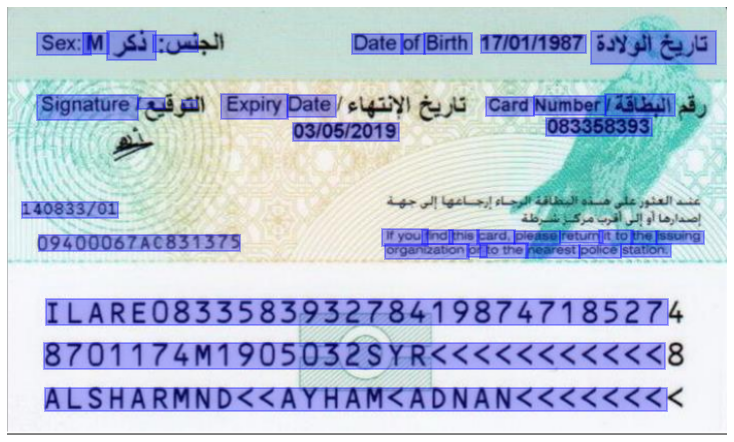

In [13]:
result.show(doc)

In [14]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (415, 698), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.0400390625, 0.0546875), (0.2646484375, 0.1240234375)), 'lines': [{'geometry': ((0.0400390625, 0.0546875), (0.2646484375, 0.1240234375)), 'words': [{'value': 'Sex:', 'confidence': 0.8708893060684204, 'geometry': ((0.0400390625, 0.0595703125), (0.115234375, 0.1123046875))}, {'value': 'M', 'confidence': 0.9990322589874268, 'geometry': ((0.1044921875, 0.060546875), (0.140625, 0.1103515625))}, {'value': '3', 'confidence': 0.5091836452484131, 'geometry': ((0.1376953125, 0.0546875), (0.2060546875, 0.1240234375))}, {'value': ':', 'confidence': 0.32645735144615173, 'geometry': ((0.201171875, 0.0654296875), (0.2646484375, 0.1044921875))}]}], 'artefacts': []}, {'geometry': ((0.4775390625, 0.0556640625), (0.984375, 0.1328125)), 'lines': [{'geometry': ((0.4775390625, 0.0556640625), (0.984375, 0.1328125)), 'words': [{'va

**Josnified result**

```
{
   "pages":[
      {
         "page_idx":0,
         "dimensions":(415,
         698),
         "orientation":{
            "value":"None",
            "confidence":"None"
         },
         "language":{
            "value":"None",
            "confidence":"None"
         },
         "blocks":[
            {
               "geometry":((0.0400390625,
               0.0546875),
               (0.2646484375,
               0.1240234375)),
               "lines":[
                  {
                     "geometry":((0.0400390625,
                     0.0546875),
                     (0.2646484375,
                     0.1240234375)),
                     "words":[
                        {
                           "value":"Sex:",
                           "confidence":0.8708893060684204,
                           "geometry":((0.0400390625,
                           0.0595703125),
                           (0.115234375,
                           0.1123046875))
                        },
                        {
                           "value":"M",
                           "confidence":0.9990322589874268,
                           "geometry":((0.1044921875,
                           0.060546875),
                           (0.140625,
                           0.1103515625))
                        },
                        {
                           "value":"3",
                           "confidence":0.5091836452484131,
                           "geometry":((0.1376953125,
                           0.0546875),
                           (0.2060546875,
                           0.1240234375))
                        },
                        {
                           "value":":",
                           "confidence":0.32645735144615173,
                           "geometry":((0.201171875,
                           0.0654296875),
                           (0.2646484375,
                           0.1044921875))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.4775390625,
               0.0556640625),
               (0.984375,
               0.1328125)),
               "lines":[
                  {
                     "geometry":((0.4775390625,
                     0.0556640625),
                     (0.984375,
                     0.1328125)),
                     "words":[
                        {
                           "value":"Date",
                           "confidence":0.9930076599121094,
                           "geometry":((0.4775390625,
                           0.0615234375),
                           (0.548828125,
                           0.109375))
                        },
                        {
                           "value":"of",
                           "confidence":0.9998698234558105,
                           "geometry":((0.5458984375,
                           0.0625),
                           (0.580078125,
                           0.1083984375))
                        },
                        {
                           "value":"Birth",
                           "confidence":0.9980013966560364,
                           "geometry":((0.578125,
                           0.060546875),
                           (0.6455078125,
                           0.109375))
                        },
                        {
                           "value":"17/01/1987",
                           "confidence":0.9972760081291199,
                           "geometry":((0.6572265625,
                           0.0654296875),
                           (0.802734375,
                           0.107421875))
                        },
                        {
                           "value":"S",
                           "confidence":0.19176381826400757,
                           "geometry":((0.810546875,
                           0.0556640625),
                           (0.984375,
                           0.1328125))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.041015625,
               0.2021484375),
               (0.4560546875,
               0.263671875)),
               "lines":[
                  {
                     "geometry":((0.041015625,
                     0.2021484375),
                     (0.4560546875,
                     0.263671875)),
                     "words":[
                        {
                           "value":"Signature",
                           "confidence":0.7766589522361755,
                           "geometry":((0.041015625,
                           0.205078125),
                           (0.1806640625,
                           0.263671875))
                        },
                        {
                           "value":":",
                           "confidence":0.5538589954376221,
                           "geometry":((0.181640625,
                           0.2119140625),
                           (0.2177734375,
                           0.2373046875))
                        },
                        {
                           "value":"-",
                           "confidence":0.44958680868148804,
                           "geometry":((0.2421875,
                           0.216796875),
                           (0.2626953125,
                           0.236328125))
                        },
                        {
                           "value":"Expiry",
                           "confidence":0.9996009469032288,
                           "geometry":((0.296875,
                           0.2021484375),
                           (0.3896484375,
                           0.26171875))
                        },
                        {
                           "value":"Date",
                           "confidence":0.9984633922576904,
                           "geometry":((0.3876953125,
                           0.2060546875),
                           (0.4560546875,
                           0.255859375))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.6640625,
               0.203125),
               (0.9267578125,
               0.25390625)),
               "lines":[
                  {
                     "geometry":((0.6640625,
                     0.203125),
                     (0.9267578125,
                     0.25390625)),
                     "words":[
                        {
                           "value":"Card",
                           "confidence":0.9718506932258606,
                           "geometry":((0.6640625,
                           0.208984375),
                           (0.73046875,
                           0.2529296875))
                        },
                        {
                           "value":"Number",
                           "confidence":0.8406065702438354,
                           "geometry":((0.73046875,
                           0.2080078125),
                           (0.8310546875,
                           0.251953125))
                        },
                        {
                           "value":"1A3uA1",
                           "confidence":0.1963910162448883,
                           "geometry":((0.8291015625,
                           0.203125),
                           (0.9267578125,
                           0.25390625))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.396484375,
               0.2705078125),
               (0.54296875,
               0.3125)),
               "lines":[
                  {
                     "geometry":((0.396484375,
                     0.2705078125),
                     (0.54296875,
                     0.3125)),
                     "words":[
                        {
                           "value":"03/05/2019",
                           "confidence":0.9903636574745178,
                           "geometry":((0.396484375,
                           0.2705078125),
                           (0.54296875,
                           0.3125))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.748046875,
               0.2578125),
               (0.89453125,
               0.30078125)),
               "lines":[
                  {
                     "geometry":((0.748046875,
                     0.2578125),
                     (0.89453125,
                     0.30078125)),
                     "words":[
                        {
                           "value":"083358393",
                           "confidence":0.9996588230133057,
                           "geometry":((0.748046875,
                           0.2578125),
                           (0.89453125,
                           0.30078125))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.01953125,
               0.4560546875),
               (0.1533203125,
               0.4912109375)),
               "lines":[
                  {
                     "geometry":((0.01953125,
                     0.4560546875),
                     (0.1533203125,
                     0.4912109375)),
                     "words":[
                        {
                           "value":"140833/01",
                           "confidence":0.9747198820114136,
                           "geometry":((0.01953125,
                           0.4560546875),
                           (0.1533203125,
                           0.4912109375))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.04296875,
               0.5322265625),
               (0.322265625,
               0.5703125)),
               "lines":[
                  {
                     "geometry":((0.04296875,
                     0.5322265625),
                     (0.322265625,
                     0.5703125)),
                     "words":[
                        {
                           "value":"09400067AC831375",
                           "confidence":0.49421653151512146,
                           "geometry":((0.04296875,
                           0.5322265625),
                           (0.322265625,
                           0.5703125))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.5205078125,
               0.517578125),
               (0.966796875,
               0.5888671875)),
               "lines":[
                  {
                     "geometry":((0.5205078125,
                     0.517578125),
                     (0.966796875,
                     0.556640625)),
                     "words":[
                        {
                           "value":"Ifyout",
                           "confidence":0.49048352241516113,
                           "geometry":((0.5205078125,
                           0.517578125),
                           (0.583984375,
                           0.556640625))
                        },
                        {
                           "value":"find",
                           "confidence":0.89292311668396,
                           "geometry":((0.5751953125,
                           0.51953125),
                           (0.6181640625,
                           0.552734375))
                        },
                        {
                           "value":"this",
                           "confidence":0.9970747232437134,
                           "geometry":((0.61328125,
                           0.5205078125),
                           (0.654296875,
                           0.5537109375))
                        },
                        {
                           "value":"card,",
                           "confidence":0.9905139207839966,
                           "geometry":((0.6513671875,
                           0.521484375),
                           (0.7041015625,
                           0.5537109375))
                        },
                        {
                           "value":"please",
                           "confidence":0.9139431715011597,
                           "geometry":((0.703125,
                           0.5224609375),
                           (0.767578125,
                           0.552734375))
                        },
                        {
                           "value":"retum",
                           "confidence":0.9666957855224609,
                           "geometry":((0.7666015625,
                           0.5234375),
                           (0.8271484375,
                           0.5498046875))
                        },
                        {
                           "value":"ito",
                           "confidence":0.5499321818351746,
                           "geometry":((0.8212890625,
                           0.5205078125),
                           (0.869140625,
                           0.552734375))
                        },
                        {
                           "value":"the",
                           "confidence":0.6550872325897217,
                           "geometry":((0.865234375,
                           0.5224609375),
                           (0.9013671875,
                           0.552734375))
                        },
                        {
                           "value":"issuing",
                           "confidence":0.676504909992218,
                           "geometry":((0.900390625,
                           0.5234375),
                           (0.966796875,
                           0.5537109375))
                        }
                     ]
                  },
                  {
                     "geometry":((0.5234375,
                     0.5517578125),
                     (0.921875,
                     0.5888671875)),
                     "words":[
                        {
                           "value":"organization",
                           "confidence":0.5625227689743042,
                           "geometry":((0.5234375,
                           0.5537109375),
                           (0.640625,
                           0.5888671875))
                        },
                        {
                           "value":"or",
                           "confidence":0.9989590644836426,
                           "geometry":((0.6376953125,
                           0.5546875),
                           (0.6650390625,
                           0.583984375))
                        },
                        {
                           "value":"tothe",
                           "confidence":0.9890111684799194,
                           "geometry":((0.65625,
                           0.5517578125),
                           (0.72265625,
                           0.5869140625))
                        },
                        {
                           "value":"nearest",
                           "confidence":0.7063907980918884,
                           "geometry":((0.7197265625,
                           0.5556640625),
                           (0.794921875,
                           0.5849609375))
                        },
                        {
                           "value":"police",
                           "confidence":0.9213776588439941,
                           "geometry":((0.79296875,
                           0.5546875),
                           (0.8515625,
                           0.5859375))
                        },
                        {
                           "value":"station.",
                           "confidence":0.9874404668807983,
                           "geometry":((0.8515625,
                           0.5537109375),
                           (0.921875,
                           0.583984375))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.052734375,
               0.6826171875),
               (0.9169921875,
               0.7431640625)),
               "lines":[
                  {
                     "geometry":((0.052734375,
                     0.6826171875),
                     (0.9169921875,
                     0.7431640625)),
                     "words":[
                        {
                           "value":"ILARE083358393278419874718527",
                           "confidence":0.8005492091178894,
                           "geometry":((0.052734375,
                           0.6826171875),
                           (0.9169921875,
                           0.7431640625))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.05078125,
               0.7841796875),
               (0.9130859375,
               0.8447265625)),
               "lines":[
                  {
                     "geometry":((0.05078125,
                     0.7841796875),
                     (0.9130859375,
                     0.8447265625)),
                     "words":[
                        {
                           "value":"8701174M19050325YRKK<K<<<<K<<",
                           "confidence":0.2194395512342453,
                           "geometry":((0.05078125,
                           0.7841796875),
                           (0.9130859375,
                           0.8447265625))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            },
            {
               "geometry":((0.0517578125,
               0.888671875),
               (0.9150390625,
               0.9423828125)),
               "lines":[
                  {
                     "geometry":((0.0517578125,
                     0.888671875),
                     (0.9150390625,
                     0.9423828125)),
                     "words":[
                        {
                           "value":"ALSHARMNDKKAYHAMKADNANKKKKKKS",
                           "confidence":0.4971131980419159,
                           "geometry":((0.0517578125,
                           0.888671875),
                           (0.9150390625,
                           0.9423828125))
                        }
                     ]
                  }
               ],
               "artefacts":[
                  
               ]
            }
         ]
      }
   ]
}
```

# Now the results of the same on trocr

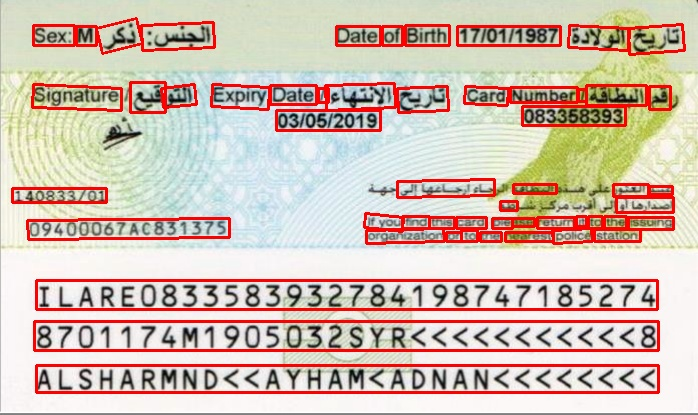


['crop_0.jpg', 'isi', 96, 142, 18, 53]<br>
['crop_1.jpg', 'sex.', 33, 74, 25, 45]<br>
['crop_2.jpg', 'innigill', 141, 214, 22, 50]<br>
['crop_3.jpg', 'birth.', 405, 449, 25, 45]
['crop_4.jpg', 'm', 76, 96, 26, 45]<br>
['crop_5.jpg', 'date', 336, 380, 26, 45]<br>
['crop_6.jpg', 'of', 382, 402, 26, 45]<br>
['crop_7.jpg', '1710111987', 457, 560, 26, 45]<br>
['crop_8.jpg', 'saywell', 568, 629, 25, 50]<br>
['crop_9.jpg', 'thyly', 628, 684, 24, 54]<br>
['crop_10.jpg', 'pair.', 130, 165, 82, 112]<br>
['crop_11.jpg', 'signature', 32, 121, 84, 110]<br>
['crop_12.jpg', 'gill', 161, 196, 84, 107]<br>
['crop_13.jpg', 'expiry', 211, 269, 84, 109]<br>
['crop_14.jpg', 'date', 270, 316, 85, 104]<br>
['crop_15.jpg', 'clgingly', 325, 395, 83, 110]<br>
['crop_16.jpg', 'dalbawl', 586, 646, 85, 105]<br>
['crop_17.jpg', 'lily', 318, 328, 88, 102]<br>
['crop_18.jpg', 'joylyly', 397, 448, 86, 112]<br>
['crop_19.jpg', 'card', 464, 508, 86, 105]<br>
['crop_20.jpg', 'spi', 649, 670, 86, 109]<br>
['crop_21.jpg', 'number', 510, 577, 87, 102]<br>
['crop_22.jpg', '1', 578, 586, 89, 101]<br>
['crop_23.jpg', '0833588393', 522, 625, 106, 125]<br>
['crop_24.jpg', '0310512019', 276, 380, 110, 130]<br>
['crop_25.jpg', 'will block pupils', 397, 494, 179, 197]<br>
['crop_26.jpg', 'loudini', 513, 556, 184, 193]<br>
['crop_27.jpg', 'joywell', 613, 648, 184, 196]<br>
['crop_28.jpg', '0', 649, 672, 186, 194]<br>
['crop_29.jpg', '140833701', 12, 106, 188, 202]<br>
['crop_30.jpg', 'pillsyllousl', 616, 673, 197, 212]<br>
['crop_31.jpg', 'wo', 500, 517, 201, 210]<br>
['crop_32.jpg', 'ilyon', 364, 403, 213, 231]<br>
['crop_33.jpg', 'find', 402, 429, 216, 228]<br>
['crop_34.jpg', 'thing', 429, 454, 217, 228]<br>
['crop_35.jpg', 'card', 456, 486, 217, 228]<br>
['crop_36.jpg', 'return', 537, 574, 217, 228]<br>
['crop_37.jpg', '11', 576, 586, 216, 226]<br>
['crop_38.jpg', 'to', 588, 602, 216, 228]<br>
['crop_39.jpg', 'one', 604, 626, 216, 228]<br>
['crop_40.jpg', 'pie', 492, 512, 218, 228]<br>
['crop_41.jpg', '1959', 512, 534, 218, 226]<br>
['crop_42.jpg', 'tasting', 628, 673, 217, 229]<br>
['crop_43.jpg', '0940006780831375', 27, 229, 218, 239]<br>
['crop_44.jpg', 'organization', 366, 444, 228, 243]<br>
['crop_45.jpg', 'police', 552, 592, 228, 243]<br>
['crop_46.jpg', 'station.', 594, 640, 229, 241]<br>
['crop_47.jpg', '01', 446, 461, 232, 241]<br>
['crop_48.jpg', '10', 461, 477, 230, 241]<br>
['crop_49.jpg', 'the', 480, 501, 232, 241]<br>
['crop_50.jpg', 'nonprofit', 505, 553, 232, 241]<br>
['crop_51.jpg', 'ILA RO833583932784198747185274', 36, 657, 280, 309]<br>
['crop_52.jpg', '8 7 0 1 1/ 4. 1 9059 0.2S.RCCCC', 34, 658, 321, 350]<br>
['crop_53.jpg', 'al Sharun de Cayham and Nanockecke', 36, 658, 365, 392]
<br>

**Now the issue with importing rotation model**

In [15]:
from doctr.models import linknet_resnet18_rotation
model = linknet_resnet18_rotation(pretrained=True)

result = model(doc)

ImportError: ignored